# Challenge Data Validation and Cleaning

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the csv file as UTF-8 as there is an encoding error otherwise
df = pd.read_csv('2013_APC_Spend.csv', encoding='ISO-8859-1')
df.head(5)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
# Rename column to seomthing more manageable
df.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)': 'Cost'}, inplace=True)
df.head(5)

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
# See how many rows are N/A in the dataframe
df.isna().sum()

PMID/PMCID       199
Publisher          0
Journal title      1
Article title      0
Cost               0
dtype: int64

In [5]:
# See how many rows there are total in comparison
# Looks like 10% of PMID are N/A
df.count()

PMID/PMCID       1928
Publisher        2127
Journal title    2126
Article title    2127
Cost             2127
dtype: int64

In [6]:
# 

In [7]:
# Strip all whitespace in dataframe
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Format all strings to capitalize
df = df.apply(lambda x: x.str.capitalize() if x.dtype == "object" else x)

# Drop the PMID column as that data is no use for the analysis and a large portion is N/A
df.drop('PMID/PMCID', axis=1, inplace=True)

# Drop the remaining 1 N/A journal title as there is only 1 
df.dropna()

df.head(5)

,Publisher,Journal title,Article title,Cost
0,Cup,Psychological medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,Acs,Biomacromolecules,Structural characterization of a model gram-ne...,£2381.04
2,Acs,J med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,Acs,J med chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,Acs,J org chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [8]:
# See datatype working with
df.dtypes
# Cost should be int not object

Publisher        object
Journal title    object
Article title    object
Cost             object
dtype: object

In [9]:
df['Cost'] = df['Cost'].str.replace('£', '')
df['Cost'] = df['Cost'].str.replace('$', '')
df['Cost'] = pd.to_numeric(df['Cost'])
df.head(5)

,Publisher,Journal title,Article title,Cost
0,Cup,Psychological medicine,Reduced parahippocampal cortical thickness in ...,0.00
1,Acs,Biomacromolecules,Structural characterization of a model gram-ne...,2381.04
2,Acs,J med chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,Acs,J med chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64
4,Acs,J org chem,Regioselective opening of myo-inositol orthoes...,685.88


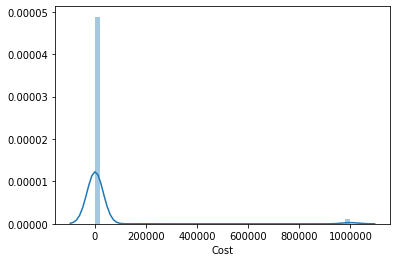

In [10]:
# Visualize data to find any outliers
df.sort_values(by=['Cost'], ascending=False)
sns.distplot(df['Cost'])
plt.show()

# Massive outliers at 999,999 need to remove

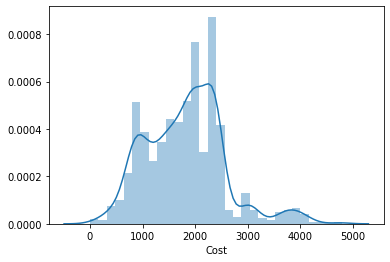

In [11]:
# Remove all data above 5,000
df = df[df['Cost']<5e3]
sns.distplot(df['Cost'])
plt.show()

In [12]:
# Group data by the average per publisher
publishers = df.groupby(['Publisher'])['Cost'].mean()
publishers.sort_values(ascending=False).head(20)

# Multiple publishers with similar variants of names

Publisher
Elsevier/cell press                   4226.040000
Elsevier (cell press)                 3915.310000
Elsevier / cell science               3895.640000
The endrocrine society                3602.410000
Journal of visualized experiments     3238.250000
Darmouth journal services             3154.010000
Npg                                   3120.000000
Nature pg                             3120.000000
Bmj publishing group ltd              3000.000000
Royal college of psychiatrists        3000.000000
The royal college of psychiatrists    3000.000000
Informa healthcare                    2907.420000
American psychological association    2905.475000
John wiley and sons ltd               2868.080000
Biochem journal                       2853.215000
Nature publishing group               2817.001042
Copyright clearace center             2775.230000
My jove corporation                   2713.140000
Jove                                  2693.210000
Myjove corporation                    26

In [13]:
# Fix the names of the top 10 publishers
df.loc[df['Publisher'].str.contains('Elsevier'), 'Publisher'] = 'Elsevier'
df.loc[df['Publisher'].str.contains('Nature', 'Npg'), 'Publisher'] = 'NPG'
df.loc[df['Publisher'].str.contains('visualized'), 'Publisher'] = 'Journal of visualized experiments'
df.loc[df['Publisher'].str.contains('college of psychiatrists'), 'Publisher'] = 'Royal college of psychiatrists'
df.loc[df['Publisher'].str.contains('Bmj'), 'Publisher'] = 'Bmj'
df.loc[df['Publisher'].str.contains('Informa'), 'Publisher'] = 'Informa healthcare'

In [14]:
# Output the fixed top 5 list
publishers = df.groupby(['Publisher'])['Cost'].mean()
publishers.sort_values(ascending=False).head(5)

Publisher
The endrocrine society                3602.410
Darmouth journal services             3154.010
Npg                                   3120.000
Royal college of psychiatrists        3000.000
American psychological association    2905.475
Name: Cost, dtype: float64